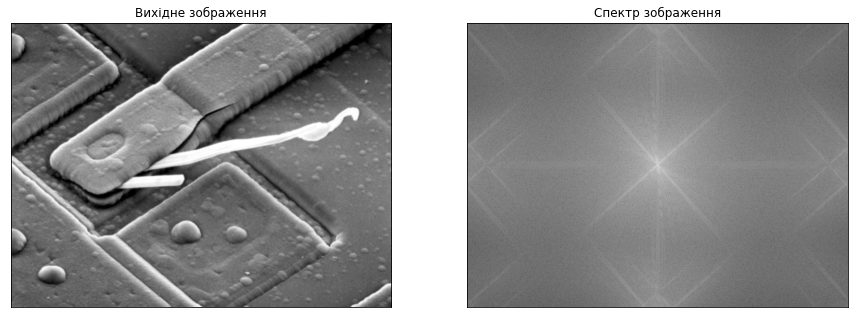

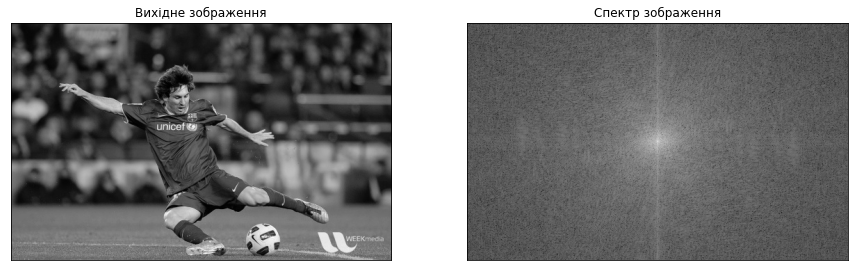

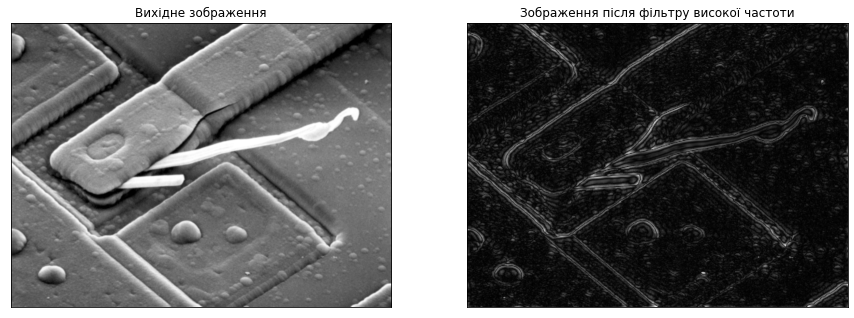

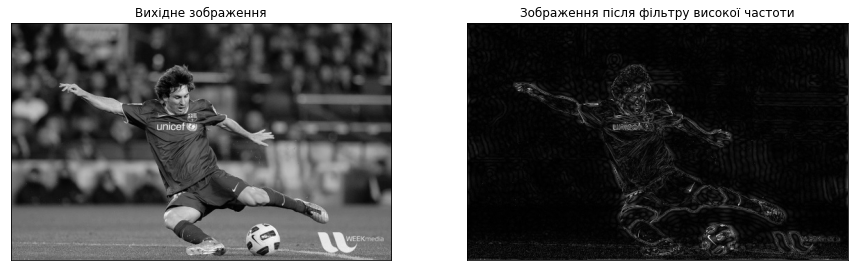

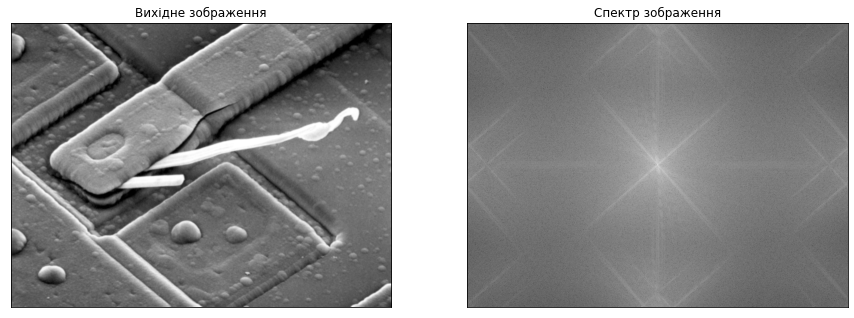

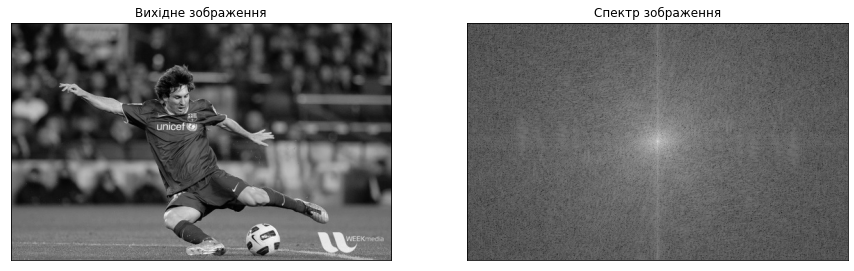

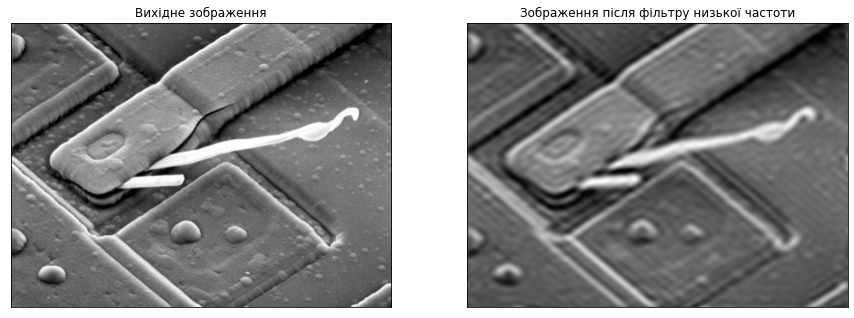

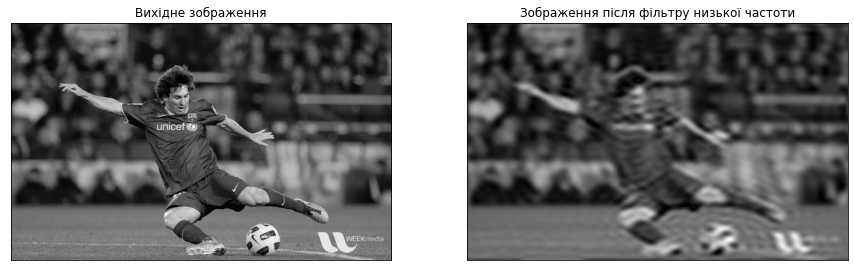

(678, 906)
(342, 548)


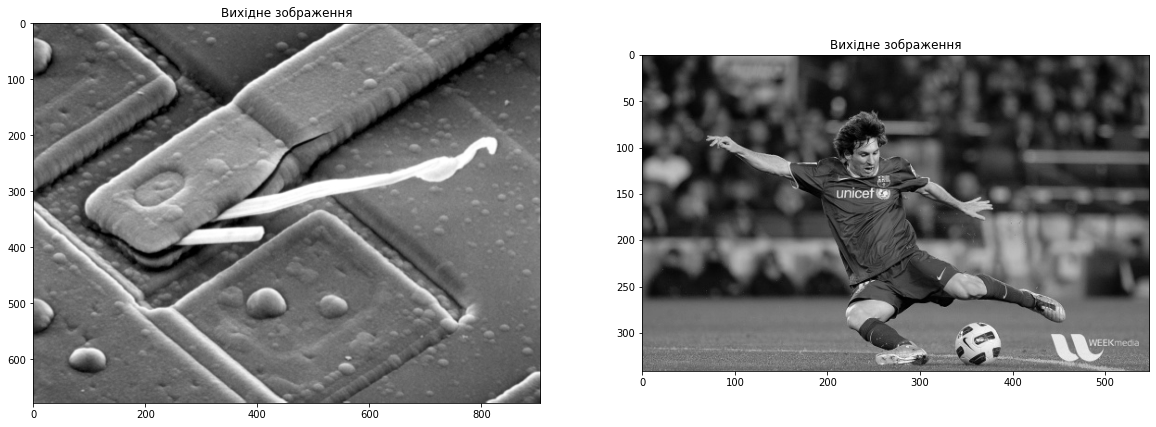

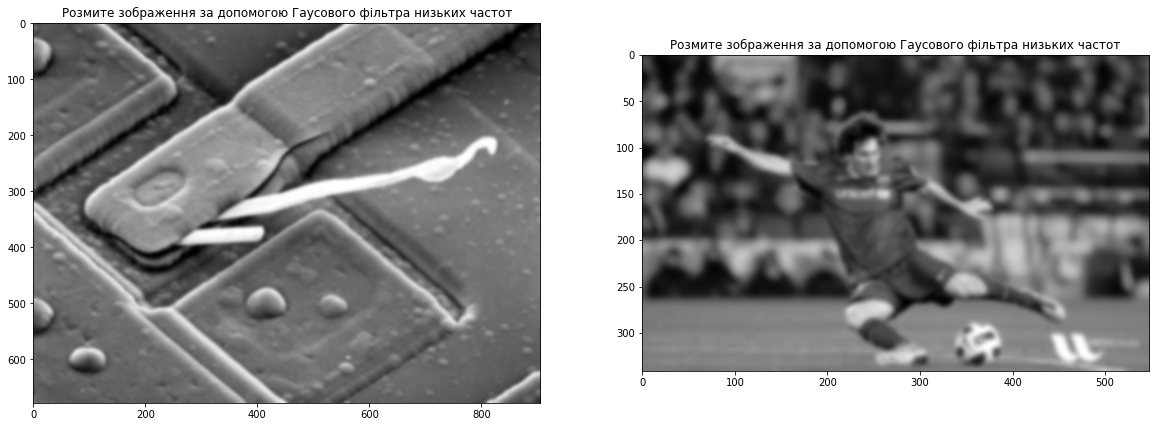

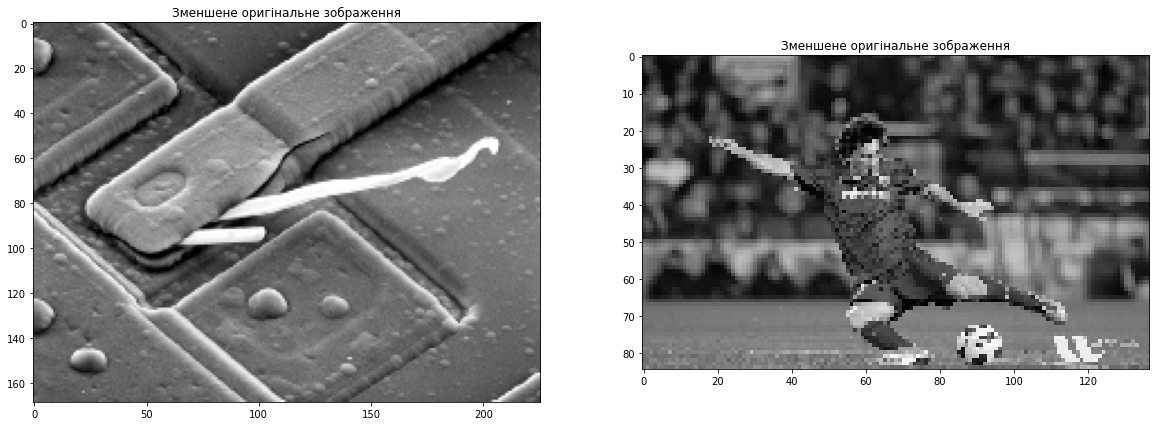

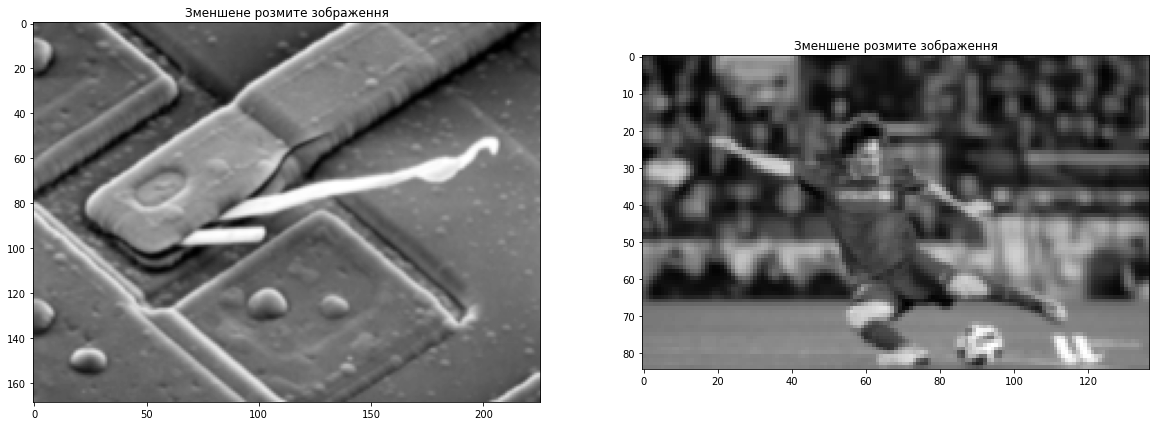

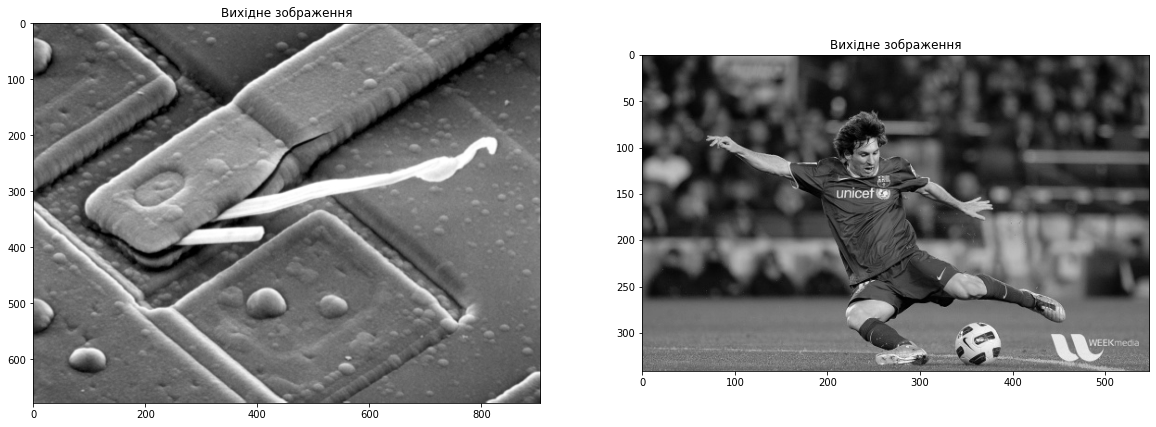

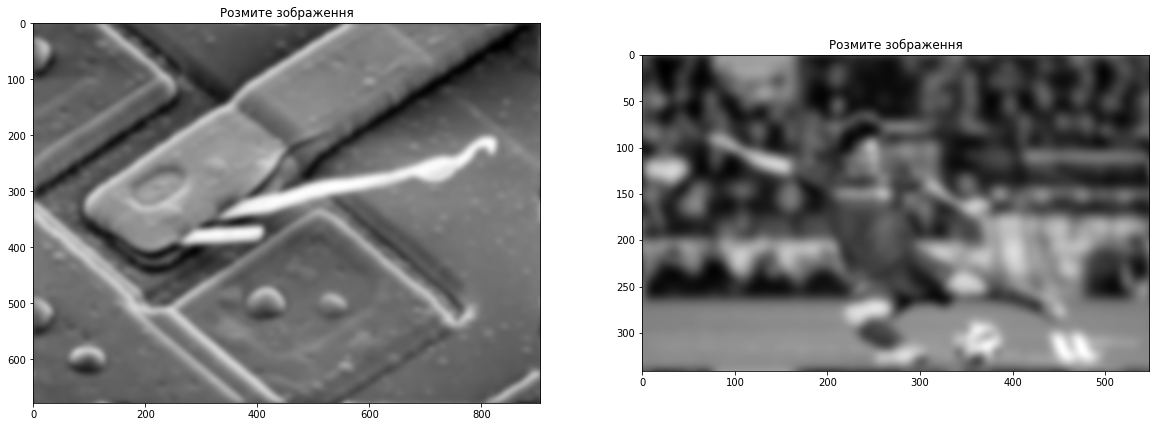

(678, 906) (1356, 1812)
(342, 548) (684, 1096)


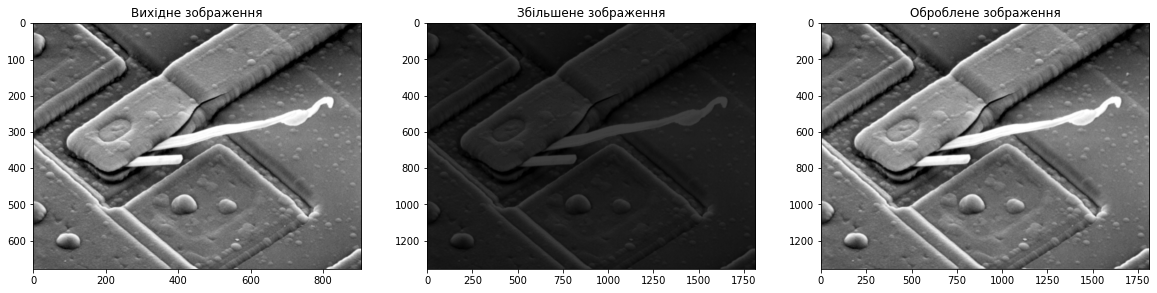

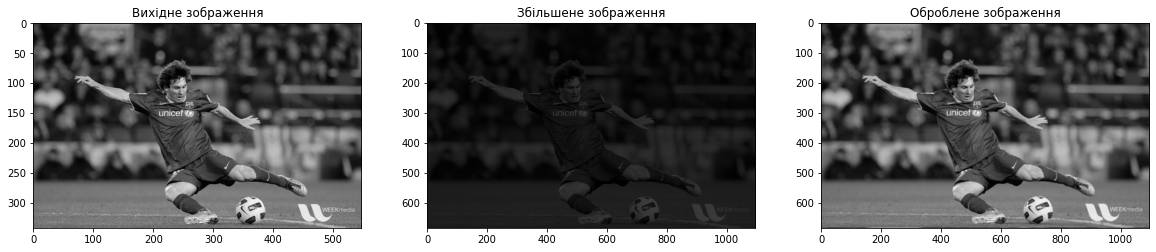

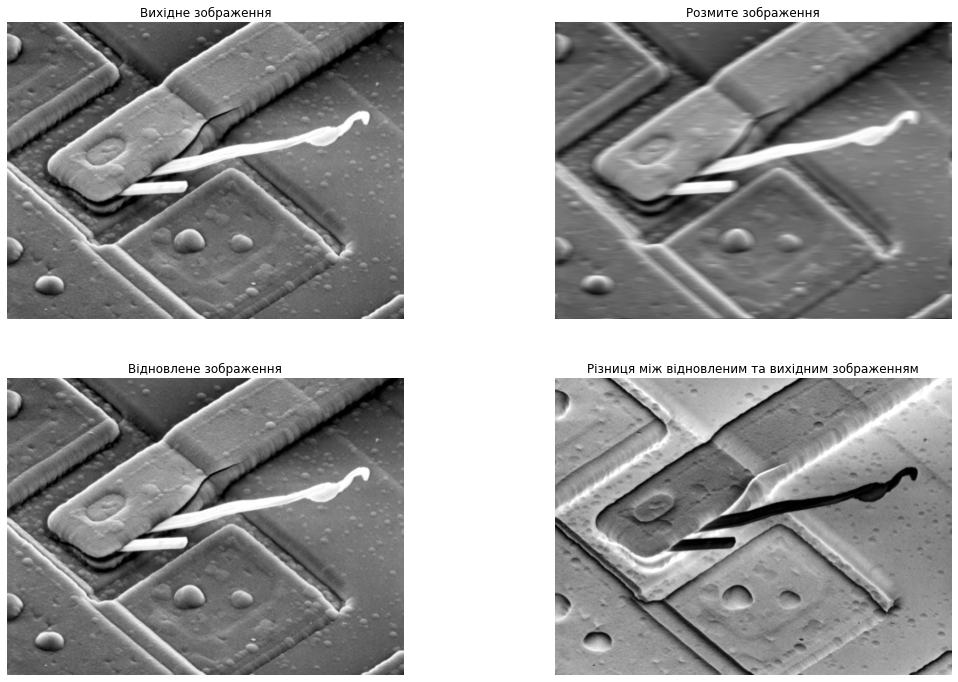

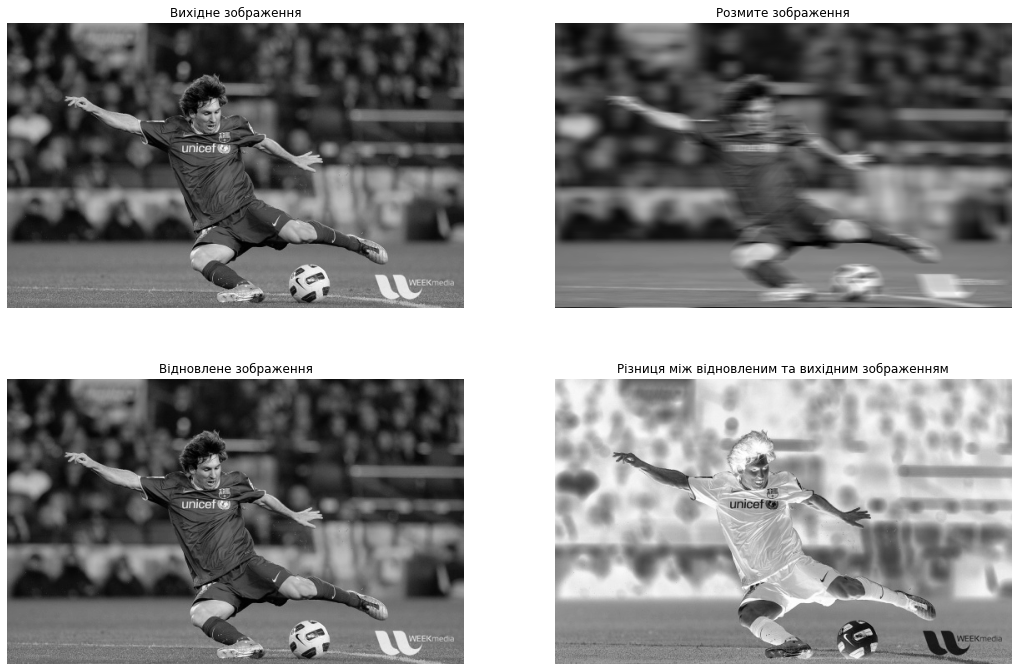

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
import scipy.fftpack as fp
from scipy import signal
import sys

def padwithzeros(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    return vector

img_ref = cv2.imread("C:\\Users\\User\\Desktop\\Slavik\\lab7\\Fig0429a.tif",0)
img = cv2.imread("C:\\Users\\User\\Desktop\\Slavik\\lab7\\messi5.jpg",0)

f_ref = np.fft.fft2(img_ref)
fshift_ref = np.fft.fftshift(f_ref)
magnitude_spectrum_ref = 20*np.log(np.abs(fshift_ref))

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img_ref, cmap = 'gray')
plt.title('Вихідне зображення'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum_ref, cmap = 'gray')
plt.title('Спектр зображення'), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Вихідне зображення'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Спектр зображення'), plt.xticks([]), plt.yticks([])
plt.show()

rows_ref, cols_ref = img_ref.shape
crow_ref, ccol_ref = rows_ref/2 , cols_ref/2
fshift_ref[int(crow_ref-30):int(crow_ref+30), int(ccol_ref-30):int(ccol_ref+30)] = 0
f_ishift_ref = np.fft.ifftshift(fshift_ref)
img_back_ref = np.fft.ifft2(f_ishift_ref)
img_back_ref = np.abs(img_back_ref)

rows, cols = img.shape
crow,ccol = rows/2 , cols/2
fshift[int(crow-30):int(crow+30), int(ccol-30):int(ccol+30)] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img_ref, cmap = 'gray')
plt.title('Вихідне зображення'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back_ref, cmap = 'gray')
plt.title('Зображення після фільтру високої частоти'), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Вихідне зображення'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Зображення після фільтру високої частоти'), plt.xticks([]), plt.yticks([])
plt.show()

dft_ref = cv2.dft(np.float32(img_ref),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift_ref = np.fft.fftshift(dft_ref)
magnitude_spectrum_ref = 20*np.log(cv2.magnitude(dft_shift_ref[:,:,0],dft_shift_ref[:,:,1]))

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))


plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img_ref, cmap = 'gray')
plt.title('Вихідне зображення'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum_ref, cmap = 'gray')
plt.title('Спектр зображення'), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Вихідне зображення'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Спектр зображення'), plt.xticks([]), plt.yticks([])
plt.show()

rows_ref, cols_ref = img_ref.shape
crow_ref, ccol_ref = rows_ref/2 , cols_ref/2

rows, cols = img.shape
crow,ccol = rows/2 , cols/2

mask_ref = np.zeros((rows_ref,cols_ref,2),np.uint8)
mask_ref[int(crow_ref - 30):int(crow_ref + 30), int(ccol_ref - 30):int(ccol_ref + 30)] = 1

mask = np.zeros((rows, cols,2),np.uint8)
mask[int(crow - 30):int(crow + 30), int(ccol - 30):int(ccol + 30)] = 1

fshift_ref = dft_shift_ref * mask_ref
f_ishift_ref = np.fft.ifftshift(fshift_ref)
img_back_ref = cv2.idft(f_ishift_ref)
img_back_ref = cv2.magnitude(img_back_ref[:,:,0],img_back_ref[:,:,1])

fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img_ref, cmap = 'gray')
plt.title('Вихідне зображення'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back_ref, cmap = 'gray')
plt.title('Зображення після фільтру низької частоти'), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Вихідне зображення'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Зображення після фільтру низької частоти'), plt.xticks([]), plt.yticks([])
plt.show()

print(img_ref.shape)
print(img.shape)
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img_ref, cmap = 'gray'); plt.title('Вихідне зображення')
plt.subplot(122),plt.imshow(img, cmap = 'gray'); plt.title('Вихідне зображення')
plt.show()

plt.figure(figsize=(20,20))
im_blurred_ref = gaussian_filter(img_ref, sigma=2.5)
im_blurred = gaussian_filter(img, sigma=2.5)
plt.subplot(121),plt.imshow(im_blurred_ref, cmap = 'gray'); plt.title('Розмите зображення за допомогою Гаусового фільтра низьких частот')
plt.subplot(122),plt.imshow(im_blurred, cmap = 'gray'); plt.title('Розмите зображення за допомогою Гаусового фільтра низьких частот')
plt.show()

n = 4 
w_ref, h_ref = img_ref.shape[0] // n, img_ref.shape[1] // n
im_small_ref = np.zeros((w_ref,h_ref))
for i in range(w_ref):
   for j in range(h_ref):
      im_small_ref[i,j] = img_ref[n*i, n*j]
        
w, h = img.shape[0] // n, img.shape[1] // n
im_small = np.zeros((w,h))
for i in range(w):
   for j in range(h):
      im_small[i,j] = img[n*i, n*j]

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(im_small_ref, cmap = 'gray'); plt.title('Зменшене оригінальне зображення')
plt.subplot(122),plt.imshow(im_small, cmap = 'gray'); plt.title('Зменшене оригінальне зображення')

plt.show()

im_small_ref = np.zeros((w_ref,h_ref))
for i in range(w_ref):
   for j in range(h_ref):
      im_small_ref[i,j] = im_blurred_ref[n*i, n*j]
        
im_small = np.zeros((w,h))
for i in range(w):
   for j in range(h):
      im_small[i,j] = im_blurred[n*i, n*j]


plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(im_small_ref, cmap = 'gray'); plt.title('Зменшене розмите зображення')
plt.subplot(122),plt.imshow(im_small, cmap = 'gray'); plt.title('Зменшене розмите зображення')
plt.show()


kernel_ref = np.outer(signal.gaussian(img_ref.shape[0], 5), signal.gaussian(img_ref.shape[1], 5))
freq_ref = fp.fft2(img_ref)
assert(freq_ref.shape == kernel_ref.shape)
freq_kernel_ref = fp.fft2(fp.ifftshift(kernel_ref))
convolved_ref = freq_ref*freq_kernel_ref # by the Convolution theorem
im_blur_ref = fp.ifft2(convolved_ref).real
im_blur_ref = 255 * im_blur_ref / np.max(im_blur_ref)

kernel = np.outer(signal.gaussian(img.shape[0], 5), signal.gaussian(img.shape[1], 5))
freq = fp.fft2(img)
assert(freq.shape == kernel.shape)
freq_kernel = fp.fft2(fp.ifftshift(kernel))
convolved = freq*freq_kernel # by the Convolution theorem
im_blur = fp.ifft2(convolved).real
im_blur = 255 * im_blur / np.max(im_blur)

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img_ref, cmap = 'gray'); plt.title('Вихідне зображення')
plt.subplot(122),plt.imshow(img, cmap = 'gray'); plt.title('Вихідне зображення')
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(im_blur_ref, cmap = 'gray'); plt.title('Розмите зображення')
plt.subplot(122),plt.imshow(im_blur, cmap = 'gray'); plt.title('Розмите зображення')

plt.show()


im1_ref = np.zeros((2*img_ref.shape[0], 2*img_ref.shape[1]))
im1 = np.zeros((2*img.shape[0], 2*img.shape[1]))
print(img_ref.shape, im1_ref.shape)
print(img.shape, im1.shape)

for i in range(img_ref.shape[0]):
    for j in range(img_ref.shape[1]):
        im1_ref[2*i,2*j] = img_ref[i,j]
        
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        im1[2*i,2*j] = img[i,j]

kernel = [[0.25, 0.5, 0.25], [0.5, 1, 0.5], [0.25, 0.5, 0.25]]


kernel_ref = np.pad(kernel, (((im1_ref.shape[0]-3)//2,(im1_ref.shape[0]-3)//2+1), ((im1_ref.shape[1]-3)//2,(im1_ref.shape[1]-3)//2+1)), padwithzeros)
kernel = np.pad(kernel, (((im1.shape[0]-3)//2,(im1.shape[0]-3)//2+1), ((im1.shape[1]-3)//2,(im1.shape[1]-3)//2+1)), padwithzeros)
freq_ref = fp.fft2(im1_ref)
freq_kernel_ref = fp.fft2(fp.ifftshift(kernel_ref))
freq_LPF_ref = freq_ref*freq_kernel_ref # by the Convolution theorem
im2_ref = fp.ifft2(freq_LPF_ref)
freq_im2_ref = fp.fft2(im2_ref)

freq = fp.fft2(im1)
freq_kernel = fp.fft2(fp.ifftshift(kernel))
freq_LPF = freq*freq_kernel # by the Convolution theorem
im2 = fp.ifft2(freq_LPF)
freq_im2 = fp.fft2(im2)
plt.figure(figsize=(20,20))
plt.gray()
plt.subplot(1,3,1)
plt.imshow(img_ref)
plt.title('Вихідне зображення')
plt.subplot(1,3,2)
plt.imshow(im1_ref)
plt.title('Збільшене зображення')
plt.subplot(1,3,3)
plt.imshow(im2_ref.real) # the imaginary part is an artifact
plt.title('Оброблене зображення')

plt.figure(figsize=(20,20))
plt.gray()
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Вихідне зображення')
plt.subplot(1,3,2)
plt.imshow(im1)
plt.title('Збільшене зображення')
plt.subplot(1,3,3)
plt.imshow(im2.real) # the imaginary part is an artifact
plt.title('Оброблене зображення')
plt.show()

size = 21
kernel = np.zeros((size, size))
kernel[int((size-1)/2), :] = np.ones(size)
kernel = kernel / size
kernel_ref = np.pad(kernel, (((img_ref.shape[0]-size)//2,(img_ref.shape[0]-size)//2+1), ((img_ref.shape[1]-size)//2,(img_ref.shape[1]-size)//2+1)), padwithzeros)
kernel = np.pad(kernel, (((img.shape[0]-size)//2,(img.shape[0]-size)//2+1), ((img.shape[1]-size)//2,(img.shape[1]-size)//2+1)), padwithzeros)

freq_ref = fp.fft2(img_ref)
freq_kernel_ref = fp.fft2(fp.ifftshift(kernel_ref))
convolved1_ref = freq_ref*freq_kernel_ref
im_blur_ref = fp.ifft2(convolved1_ref).real
im_blur_ref = im_blur_ref / np.max(im_blur_ref)

freq = fp.fft2(img)
freq_kernel = fp.fft2(fp.ifftshift(kernel))
convolved1 = freq*freq_kernel
im_blur = fp.ifft2(convolved1).real
im_blur = im_blur / np.max(im_blur)
epsilon = 10**-6
freq_ref = fp.fft2(im_blur_ref)
freq_kernel_ref = 1 / (epsilon + freq_kernel_ref)

freq = fp.fft2(im_blur)
freq_kernel = 1 / (epsilon + freq_kernel)
convolved_ref = freq_ref*freq_kernel_ref
im_restored_ref = fp.ifft2(convolved_ref).real
im_restored_ref = im_restored_ref / np.max(im_restored_ref)

convolved = freq*freq_kernel
im_restored = fp.ifft2(convolved).real
im_restored = im_restored / np.max(im_restored)
plt.figure(figsize=(18,12))
plt.subplot(221)
plt.imshow(img_ref)
plt.title('Вихідне зображення')
plt.axis('off')
plt.subplot(222)
plt.imshow(im_blur_ref)
plt.title('Розмите зображення')
plt.axis('off')
plt.subplot(223)
plt.imshow(im_restored_ref)
plt.title('Відновлене зображення')
plt.axis('off')
plt.subplot(224)
plt.imshow(im_restored_ref - img_ref)
plt.title('Різниця між відновленим та вихідним зображенням')
plt.axis('off')

plt.figure(figsize=(18,12))
plt.subplot(221)
plt.imshow(img)
plt.title('Вихідне зображення')
plt.axis('off')
plt.subplot(222)
plt.imshow(im_blur)
plt.title('Розмите зображення')
plt.axis('off')
plt.subplot(223)
plt.imshow(im_restored)
plt.title('Відновлене зображення')
plt.axis('off')
plt.subplot(224)
plt.imshow(im_restored - img)
plt.title('Різниця між відновленим та вихідним зображенням')
plt.axis('off')
plt.show()